# Project: Wrangle and Analyze Data @WeRateDogs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Analysis and Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

The goal of this project is to gather, assess, and clean data from different sources. Once completed, some insights and visualizations should be communicated. In addition, two separate documents reporting on 1) data wrangling efforts and 2) data analyses and visualizations should be presented.

In [1]:
#importing libraries to be used throughout the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import requests
import os
import tweepy
import time
import json
%matplotlib inline
pd.set_option('max_colwidth', 200)

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

In [2]:
#reading in manually downloaded csv file into a dataframe
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [3]:
#downloading image_predictions tsv file programmatically and reading it into a dataframe 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [ ]:
connecting to twitter api using tweepy
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
saving tweet json info to tweet_json.txt file, 1 line for each tweet
ranking = 0
start = time.time()
errors = []

with open('tweet_json.txt', mode='w') as file:
    for tweet in twitter_archive_enhanced.tweet_id.values:
        try:
            tweet_data = str(api.get_status(tweet, tweet_mode='extended')._json)
            file.write(tweet_data + '\n')
            ranking = ranking + 1
            end = time.time()
            minutes = (end-start) // 60
            seconds = (end-start) % 60
            print('Tweet number: {} in {} mins and {} secs.'.format(ranking, int(minutes), int(seconds)))
        except Exception as e:
            ranking = ranking + 1
            errors.append(tweet)
            print(ranking, tweet, str(e))
len(errors)

In [4]:
#reading in tweet_id, retweet_count and favorite_count from text file to dataframe
df_list = []

with open('tweet_json.txt', encoding='utf-8', mode='r') as file:
    for line in file:
        tweet = eval(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
twitter_api = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [5]:
twitter_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7480,35411
1,892177421306343426,5550,30642
2,891815181378084864,3672,23048
3,891689557279858688,7654,38707
4,891327558926688256,8255,36968
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,124,265
2328,666033412701032449,39,109
2329,666029285002620928,41,119


### Assessing Data

In [6]:
#viewing in a spreadsheet program as well
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [7]:
#viewing in a spreadsheet program as well
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#viewing in a spreadsheet program as well
twitter_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7480,35411
1,892177421306343426,5550,30642
2,891815181378084864,3672,23048
3,891689557279858688,7654,38707
4,891327558926688256,8255,36968
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,124,265
2328,666033412701032449,39,109
2329,666029285002620928,41,119


**`twitter_archive_enhanced`** columns descriptions
>twitter's API data dictionary is also used as a reference in defining what each column contains https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet

- **tweet_id**: unique ID of every tweet such that a tweet's URL is https://twitter.com/dog_rates/status/tweet_id
- **in_reply_to_status_id**: in case of a reply tweet, unique ID of tweet being replied to
- **in_reply_to_user_id**: in case of a reply tweet, unique ID of user being replied to
- **timestamp**: date and time(GMT) of tweet
- **source**: sorce of tweet whether Twitter mobile/web or othe applications were used to initiate the tweet
- **text**: full text of tweet
- **retweeted_status_id**: in case of a retweet, unique ID of tweet being retweeted
- **retweeted_status_user_id**: in case of a retweet, unique ID of user being retweeted
- **retweeted_status_timestamp**: in case of a retweet, date and time(GMT) of original tweet
- **expanded_urls**: full URL(s) of tweet/media
- **rating_numerator**: numerator of dog score which exceed denominator in most cases
- **rating_denominator**: denominator of dog score and is almost always 10
- **name**: doge name
- **doggo**: type of dog stage label containing either 'doggo' or 'None' based on mentions in tweet
- **floofer**: type of dog stage label containing either 'floofer' or 'None' based on mentions in tweet
- **pupper**: type of dog stage label containing either 'pupper' or 'None' based on mentions in tweet
- **puppo**: type of dog stage label containing either 'puppo' or 'None' based on mentions in tweet

**`image_predictions`** columns descriptions
- **tweet_id**: unique ID of every tweet such that a tweet's URL is https://twitter.com/dog_rates/status/tweet_id
- **jpg_url**: URL of image in tweet
- **img_num**: order of image in tweet
- **p1**: algorithm's 1st prediction for the image in the tweet -result of neural network classifying dog breeds
- **p1_conf**: how confident the algorithm is in its 1st prediction -result of neural network classifying dog breeds
- **p1_dog**: whether or not the 1st prediction is a breed of dog -result of neural network classifying dog breeds
- **p2**: algorithm's 2nd most likely prediction -result of neural network classifying dog breeds
- **p2_conf**: how confident the algorithm is in its 2nd prediction -result of neural network classifying dog breeds
- **p2_dog**: whether or not the 2nd prediction is a breed of dog -result of neural network classifying dog breeds
- **p3**: algorithm's 3rd most likely prediction -result of neural network classifying dog breeds
- **p3_conf**: how confident the algorithm is in its 3rd prediction -result of neural network classifying dog breeds
- **p3_dog**: whether or not the 3rd prediction is a breed of dog -result of neural network classifying dog breeds

**`twitter_api`** columns descriptions
- **tweet_id**: unique ID of every tweet such that a tweet's URL is https://twitter.com/dog_rates/status/tweet_id
- **retweet_count**: count of retweets
- **favorite_count**: count of favorites
- **retweeted**: whether the tweet is a retweet or not


In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [12]:
twitter_archive_enhanced.name.value_counts()[:40]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
Sadie        8
the          8
Daisy        7
Bailey       7
an           7
Toby         7
Buddy        7
Jax          6
Dave         6
Scout        6
Leo          6
Stanley      6
Jack         6
Oscar        6
Bella        6
Milo         6
Rusty        6
Koda         6
Phil         5
Bentley      5
Sammy        5
Louis        5
Chester      5
Sunny        5
Larry        5
Oakley       5
Gus          5
Alfie        5
George       5
Name: name, dtype: int64

In [13]:
twitter_archive_enhanced[twitter_archive_enhanced.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,http...",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Than

In [14]:
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
twitter_archive_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
twitter_archive_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
twitter_archive_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions) + list(twitter_api))
all_columns[all_columns.duplicated(keep=False)]

0     tweet_id
17    tweet_id
29    tweet_id
dtype: object

In [19]:
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,"https://twitter.com/twitter/

In [20]:
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_user_id.isnull()].describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.215172,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.725696,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


In [21]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator != 10].shape[0]

23

In [22]:
no_retweets = twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_user_id.isnull()]
no_retweets.query('rating_denominator % 10 != 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [23]:
no_retweets.query('rating_denominator != 10')[twitter_archive_enhanced.rating_denominator % 10 == 0]

<ipython-input-23-dd8e87286c2f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_retweets.query('rating_denominator != 10')[twitter_archive_enhanced.rating_denominator % 10 == 0]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None


In [24]:
no_retweets.query('rating_denominator == 10').rating_numerator.value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
75        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [25]:
no_retweets.query('rating_denominator == 10')[twitter_archive_enhanced.rating_numerator > 20]

<ipython-input-25-5d6ccf287b77>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_retweets.query('rating_denominator == 10')[twitter_archive_enhanced.rating_numerator > 20]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [26]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [27]:
twitter_archive_enhanced[twitter_archive_enhanced.in_reply_to_user_id == 4196983835]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
234,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [28]:
twitter_archive_enhanced.tweet_id.nunique() == twitter_archive_enhanced.shape[0]

True

In [29]:
twitter_api.tweet_id.nunique() == twitter_api.shape[0]

True

In [30]:
image_predictions.tweet_id.nunique() == image_predictions.shape[0]

True

In [31]:
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_user_id.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [32]:
twitter_archive_enhanced.tweet_id.isin(image_predictions.tweet_id).sum()

2075

In [33]:
no_retweets.tweet_id.isin(image_predictions.tweet_id).sum()

1994

In [34]:
no_retweets[no_retweets.tweet_id.isin(image_predictions.tweet_id) ==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/883965650754039809,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


In [35]:
twitter_archive_enhanced.timestamp.str[-5:].value_counts()

+0000    2356
Name: timestamp, dtype: int64

In [36]:
twitter_archive_enhanced.source.nunique()

4

#### Quality
- all tables contain original tweets as well as retweets 
- (`retweeted_status_id` - `retweeted_status_user_id` - `retweeted_status_timestamp`) are not valid variables once all retweets are removed
- `rating_denominator` values are not alwaysequal to 10 due to either multiple dog ratings at once or an extraction error
- self-reply tweets containing upgraded ratings
- invalid ratings for `tweet_id`'s (855862651834028034, 722974582966214656, 680494726643068929, 778027034220126208, 786709082849828864, ....etc.)
- 'None' instead of NaN values in (`name` - `doggo` - `floofer` - `pupper` - `puppo`)
- `timestamp` always contains ' +0000?' as the last 6 characters
- inaccurate datatypes for columns (`timestamp` - `source`)
- column name of `name` is not descriptive enough
- `name` contains invalid info (i.e 'a', 'just',...etc.) 
- missing tweets, not all tweets in the **twitter_archive_enhanced** dataframe are in **image_predictions** (ignore: unfortunately, will not be able to generate)

#### Tidiness
- all 3 tables are of the same observational unit
- (`rating_numerator` - `rating_denominator`) columns are both referring to the same variable which is `dog_rating`
- (`doggo` - `floofer` - `pupper` - `puppo`) columns are all referring to the same variable which is `dog_stage`


### Cleaning Data

In [37]:
#making copies to avoid direct changes of original dataframes
twitter_archive_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy() 

Let us start by addressing the 1st **Tidiness** issue which could be solved right away.
>- all 3 tables are of the same observational unit

#### Define
1- using `merge()`, add all 3 dataframes into one

#### Code

In [38]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='left')
twitter_archive_clean = pd.merge(twitter_archive_clean, twitter_api_clean, on='tweet_id', how='left')

#### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Let us start with dropping retweets as they are not part of this project and it does not make sense to spend time and effort cleaning them if they will not be used.

>- all tables contain original tweets as well as retweets 
>- (`retweeted_status_id` - `retweeted_status_user_id` - `retweeted_status_timestamp`) are not valid variables once all retweets are removed

#### Define
1. using `isnull()`, reassign the dataframe to only rows with NaN retweet ids
2. reset the index
3. drop 3 variables with only null values using the `drop()` method

#### Code

In [40]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean.reset_index(drop=True, inplace=True)
twitter_archive_clean.drop(columns=['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], inplace=True)

#### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  jpg_url                1994 non-null   object 
 15  img_

Before addressing other tidiness issues, we need to take care of the ratings columns.
>- self-reply tweets containing upgraded ratings
>- `rating_denominator` values are not alwaysequal to 10 due to either multiple dog ratings at once or an extraction error
>- invalid ratings for `tweet_id`'s (855862651834028034, 722974582966214656, 680494726643068929, 778027034220126208, 786709082849828864,...etc.)
>- (`rating_numerator` - `rating_denominator`) columns are both referring to the same variable which is `dog_rating`

#### Define
1. create dictionary with original tweet_id using the reply column, rating_numerator, and rating_denominator
2. create dictionary with the extraction errors tweet_id, correct rating_numerator, and correct rating_denominator
3. compile both dictionaries
4. update `rating_numerator` and `rating_denominator` columns with the correct rates from the dictionary
5. normalize all ratings by multiplying numerator by denominator and dividing by 10 creating a single `dog_rating` column (assuming denominator is always 10)
6. reassign the dataframe to exclude self replies with upgraded ratings
7. reset index
8. drop the `rating_numerator` and `rating_denominator` columns

#### Code

In [42]:
twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id == 4196983835]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
131,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,...,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False,1016.0,8223.0
159,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,...,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True,1758.0,11280.0
196,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,11,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.0,7901.0
200,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a 13/10,NaN,13,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.0,6769.0
215,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,...,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True,2448.0,13274.0
326,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,7,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,5066.0
412,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN,12,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447.0,4470.0
426,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10,NaN,11,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,738.0,5588.0
467,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,...,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,1371.0,6909.0
681,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Tw

In [43]:
#creating a list of tweet_ids with pupgrades
upgrades_list = [667070482143944705, 669684865554620416,
                 671550332464455680, 673716320723169284,
                 863079547188785154, 848213670039564288,
                 856526610513747968, 847617282490613760,
                 844979544864018432, 684538444857667585,
                 813130366689148928, 681340665377193984,
                 811647686436880384, 729838605770891264,
                 696490539101908992, 692423280028966913,
                 693644216740769793, 675849018447167488,
                 676590572941893632, 678023323247357953]
upgrades_dict = {}
for tweet in twitter_archive_clean['tweet_id']:
    if tweet in upgrades_list:
        row = twitter_archive_clean[twitter_archive_clean.tweet_id == tweet]
        original = int(row.loc[:, 'in_reply_to_status_id'])
        org_index = row.index[0]
        org_numer = row.loc[org_index, 'rating_numerator']
        org_den = row.loc[org_index, 'rating_denominator']
        upgrades_dict[original] = (org_numer, org_den)
len(upgrades_dict.keys())

20

In [44]:
twitter_archive_clean.query('rating_denominator == 10')[twitter_archive_clean.rating_numerator > 20]

<ipython-input-44-92819f95a158>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_clean.query('rating_denominator == 10')[twitter_archive_clean.rating_numerator > 20]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
162,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,316.0
163,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,913.0,4649.0
246,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,182,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,1634.0
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,...,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,6076.0,18163.0
617,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,...,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1588.0,6497.0
804,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2407.0,5012.0
1533,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,...,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,470.0,1673.0
1895,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,...,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,8076.0,23201.0


In [45]:
twitter_archive_clean.query('rating_denominator % 10 != 0')[['tweet_id',
                                                             'text',
                                                             'rating_numerator',
                                                             'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
287,832088576586297345,@docmisterio account started on 11/15/15,11,15
429,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
890,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1483,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
1484,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
2154,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [46]:
twitter_archive_clean.query('rating_denominator == 0')[['tweet_id',
                                                        'text',
                                                        'rating_numerator',
                                                        'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
263,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0


In [47]:
ratings_dict = {740373189193256964: (14, 10),
                682962037429899265: (10, 10),
                666287406224695296: (9 , 10),
                835246439529840640: (13, 10),
                722974582966214656: (13, 10),
                680494726643068929: (11.26, 10),
                778027034220126208: (11.27, 10),
                786709082849828864: (9.75, 10),
                832088576586297345: (np.nan, np.nan),
                810984652412424192: (np.nan, np.nan),
                682808988178739200: (np.nan, np.nan),
                855862651834028034: (np.nan, np.nan)}
len(ratings_dict.keys())

12

In [48]:
ratings_dict.update(upgrades_dict)
len(ratings_dict.keys())

32

In [49]:
def correct_nrate(twitter_archive_clean):
    if twitter_archive_clean['tweet_id'] in ratings_dict.keys():
        result = ratings_dict[twitter_archive_clean['tweet_id']][0]
        return result
    else:
        return twitter_archive_clean['rating_numerator']

twitter_archive_clean['rating_numerator'] = twitter_archive_clean.apply(correct_nrate, axis=1)

def correct_drate(twitter_archive_clean):
    if twitter_archive_clean['tweet_id'] in ratings_dict.keys():
        result = ratings_dict[twitter_archive_clean['tweet_id']][1]
        return result
    else:
        return twitter_archive_clean['rating_denominator']
    
twitter_archive_clean['rating_denominator'] = twitter_archive_clean.apply(correct_drate, axis=1)

In [50]:
twitter_archive_clean['dog_rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'] * 10

In [51]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(upgrades_list) == False]
twitter_archive_clean.reset_index(drop=True, inplace=True)

In [52]:
twitter_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### Test

In [53]:
twitter_archive_clean.dog_rating.value_counts()

12.00      503
10.00      441
11.00      430
13.00      306
9.00       155
8.00        96
7.00        50
14.00       43
5.00        36
6.00        31
3.00        19
4.00        14
2.00        10
1.00         6
0.00         2
9.75         1
1776.00      1
17.00        1
11.27        1
666.00       1
15.00        1
11.26        1
420.00       1
182.00       1
Name: dog_rating, dtype: int64

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2155 non-null   int64  
 1   in_reply_to_status_id  58 non-null     float64
 2   in_reply_to_user_id    58 non-null     float64
 3   timestamp              2155 non-null   object 
 4   source                 2155 non-null   object 
 5   text                   2155 non-null   object 
 6   expanded_urls          2112 non-null   object 
 7   name                   2155 non-null   object 
 8   doggo                  2155 non-null   object 
 9   floofer                2155 non-null   object 
 10  pupper                 2155 non-null   object 
 11  puppo                  2155 non-null   object 
 12  jpg_url                1989 non-null   object 
 13  img_num                1989 non-null   float64
 14  p1                     1989 non-null   object 
 15  p1_c

Let fix the 'None values in the dog stage columns because we need this cleaned before converting them into 1 variable column.
>- 'None' instead of NaN values in (`name` - `doggo` - `floofer` - `pupper` - `puppo`)
>- (`doggo` - `floofer` - `pupper` - `puppo`) columns are all referring to the same variable which is `dog_stage`

#### Define
1. replace 'None's with NaN
2. melt 4 dog stage columns creating 1 dog_stages column and then remove the NaNs
3. for tweets with multiple stages, groupby and aggregate string so that stages are concatinated into 1 string (i.e stage1/stage2/...)
4. merge molten dataframe with the original dataframe and drop the orignal unmolten 4 dog stage columns

#### Code

In [55]:
def clean_nones(df_col):
    return df_col.replace('None', np.nan)

twitter_archive_clean['name'] = clean_nones(twitter_archive_clean['name'])
twitter_archive_clean['doggo'] = clean_nones(twitter_archive_clean['doggo'])
twitter_archive_clean['floofer'] = clean_nones(twitter_archive_clean['floofer'])
twitter_archive_clean['pupper'] = clean_nones(twitter_archive_clean['pupper'])
twitter_archive_clean['puppo'] = clean_nones(twitter_archive_clean['puppo'])

In [56]:
stage_df = pd.melt(twitter_archive_clean[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']],
                   id_vars=['tweet_id'], var_name='stages', value_name='dog_stage')
stage_df = stage_df[stage_df['dog_stage'].isnull() == False][['tweet_id', 'dog_stage']]
stage_df[stage_df.tweet_id.duplicated()].shape[0]

12

In [57]:
stage_df = stage_df.groupby(['tweet_id'], as_index = False).agg({'dog_stage': '/'.join})

In [58]:
twitter_archive_clean = pd.merge(twitter_archive_clean, stage_df, on='tweet_id', how='left')

In [59]:
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2155 non-null   int64  
 1   in_reply_to_status_id  58 non-null     float64
 2   in_reply_to_user_id    58 non-null     float64
 3   timestamp              2155 non-null   object 
 4   source                 2155 non-null   object 
 5   text                   2155 non-null   object 
 6   expanded_urls          2112 non-null   object 
 7   name                   1495 non-null   object 
 8   jpg_url                1989 non-null   object 
 9   img_num                1989 non-null   float64
 10  p1                     1989 non-null   object 
 11  p1_conf                1989 non-null   float64
 12  p1_dog                 1989 non-null   object 
 13  p2                     1989 non-null   object 
 14  p2_conf                1989 non-null   float64
 15  p2_d

In [61]:
twitter_archive_clean.dog_stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo/pupper      10
floofer            9
doggo/puppo        1
doggo/floofer      1
Name: dog_stage, dtype: int64

In [62]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_rating,dog_stage
686,764259802650378240,NaN,NaN,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kota and her son Benedict. She doesn't know why you're staring. They are a normal family. Both 10/10 https://t.co/Q1v9BZylvZ,"https://twitter.com/dog_rates/status/764259802650378240/photo/1,https://twitter.com/dog_rates/status/764259802650378240/photo/1",Kota,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1.0,...,malinois,0.025950,True,kelpie,0.000192,True,1479.0,5933.0,10.0,NaN
462,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ronnie. He hopes you're having a great day. Nifty tongue slip. 12/10 would pat head approvingly https://t.co/4fY2bsAm65,https://twitter.com/dog_rates/status/801958328846974976/photo/1,Ronnie,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1.0,...,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True,1719.0,7738.0,12.0,NaN
1179,702671118226825216,NaN,NaN,2016-02-25 01:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Rambo &amp; Kiwi. Rambo's the pup with the sharp toes &amp; rad mohawk. One stays woke while one sleeps. 10/10 for both https://t.co/MpH1Fe9LhZ,https://twitter.com/dog_rates/status/702671118226825216/photo/1,Rambo,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1.0,...,Sussex_spaniel,0.212017,True,clumber,0.128622,True,545.0,2133.0,10.0,NaN
738,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. He's an English Creamschnitzel. The rarest of schnitzels. 11/10 would pet quite firmly https://t.co/qbO5X6dYuj,"https://twitter.com/dog_rates/status/756998049151549440/photo/1,https://twitter.com/dog_rates/status/756998049151549440/photo/1,https://twitter.com/dog_rates/status/756998049151549440/photo/1,http...",Oliver,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4.0,...,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True,1946.0,6176.0,11.0,NaN
1030,714982300363173890,NaN,NaN,2016-03-30 01:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Calbert. He forgot to clear his Google search history. 9/10 rookie mistake Calbert https://t.co/jRm5J3YCmj,https://twitter.com/dog_rates/status/714982300363173890/photo/1,Calbert,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1.0,...,beagle,0.025435,True,Ibizan_hound,0.009962,True,1003.0,3613.0,9.0,NaN


Now let us tackle some of the remaining quality issues.
>- `timestamp` always contains ' +0000?' as the last 6 characters
>- inaccurate datatypes for columns (`timestamp` - `source`), will do this for the `dog_stages` column as well
>- column name of `name` is not descriptive enough

#### Define
1. remove last 6 characters from `timestamp` and apply pandas' `to_datetime()`
2. cast `source` and `dog_stage` columns as category type
3. rename the `name` column to `dog_name`

#### Code

In [63]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

In [64]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, yearfirst=True)

In [65]:
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

In [66]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

In [67]:
twitter_archive_clean.rename(columns={"name": "dog_name"}, inplace=True)

#### Test

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2155 non-null   int64         
 1   in_reply_to_status_id  58 non-null     float64       
 2   in_reply_to_user_id    58 non-null     float64       
 3   timestamp              2155 non-null   datetime64[ns]
 4   source                 2155 non-null   category      
 5   text                   2155 non-null   object        
 6   expanded_urls          2112 non-null   object        
 7   dog_name               1495 non-null   object        
 8   jpg_url                1989 non-null   object        
 9   img_num                1989 non-null   float64       
 10  p1                     1989 non-null   object        
 11  p1_conf                1989 non-null   float64       
 12  p1_dog                 1989 non-null   object        
 13  p2 

In [69]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,dog_name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_rating,dog_stage
1122,707059547140169728,NaN,NaN,2016-03-08 04:25:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL,"https://twitter.com/dog_rates/status/707059547140169728/photo/1,https://twitter.com/dog_rates/status/707059547140169728/photo/1",Cupcake,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1.0,...,Great_Pyrenees,0.039180,True,kuvasz,0.019516,True,654.0,2526.0,11.0,NaN
1342,690005060500217858,NaN,NaN,2016-01-21 02:56:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""I'm the only one that ever does anything in this household"" 10/10 https://t.co/V8HcVIh4jt",https://twitter.com/dog_rates/status/690005060500217858/photo/1,NaN,https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg,1.0,...,Great_Pyrenees,0.114027,True,teddy,0.072475,False,1631.0,3570.0,10.0,NaN
407,813127251579564032,NaN,NaN,2016-12-25 21:00:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's an anonymous doggo that appears to be very done with Christmas. 11/10 cheer up pup https://t.co/BzITyGw3JA,"https://twitter.com/dog_rates/status/813127251579564032/photo/1,https://twitter.com/dog_rates/status/813127251579564032/photo/1",NaN,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,1.0,...,whippet,0.374223,True,Siberian_husky,0.032463,True,3111.0,11776.0,12.0,doggo
224,841680585030541313,NaN,NaN,2017-03-14 16:01:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Penny. She's a dragon slayer. Feared by most, if not all, dragons. Showing off her latest victim here. 12/10 would pet with caution https://t.co/qUOijSlPnj",https://twitter.com/dog_rates/status/841680585030541313/photo/1,Penny,https://pbs.twimg.com/media/C65AA7_WoAEGqA9.jpg,1.0,...,bow_tie,0.198361,False,Pembroke,0.058493,True,7575.0,25167.0,12.0,NaN
69,878281511006478336,NaN,NaN,2017-06-23 16:00:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6","https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",Shadow,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1.0,...,collie,0.215975,True,Appenzeller,0.128507,True,1132.0,7118.0,13.0,NaN
895,738891149612572673,7.384119e+17,358972768.0,2016-06-04 00:32:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@mount_alex3 13/10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,104.0,13.0,NaN
953,728015554473250816,NaN,NaN,2016-05-05 00:16:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rueben. He has reached ultimate pupper zen state. 11/10 tranquil af https://t.co/Z167HgtnBi,https://twitter.com/dog_rates/status/728015554473250816/photo/1,Rueben,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1.0,...,golden_retriever,0.091661,True,sandbar,0.081799,False,1069.0,4005.0,11.0,pupper
1147,705428427625635840,NaN,NaN,2016-03-03 16:23:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ambrose. He's an Alfalfa Ballyhoo. Draws pistol fast af. Pretty much runs the frontier. 11/10 lethal pupper https://t.co/ih6epBOxIA,https://twitter.com/dog_rates/status/705428427625635840/photo/1,Ambrose,https://pbs.twimg.com/media/CcovaMUXIAApFDl.jpg,1.0,...,quilt,0.073079,False,Pembroke,0.022365,True,1624.0,3701.0,11.0,pupper
658,770069151037685760,NaN,NaN,2016-08-29 01:22:47,"<a href=""http://twitter.com/download/iphone"" r

Now let us tackle the last quality issue.
>- `name` contains invalid info (i.e 'a', 'just',...etc.) 

#### Define
1. create a list with all lowercase names
2. replace `dog_name` column invalid names with NaN

#### Code

In [70]:
unique_names = twitter_archive_clean.dog_name.unique()
invalid_name = []
for name in unique_names:
    if str(name).islower():
        invalid_name.append(name)
invalid_name

[nan,
 'such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [71]:
twitter_archive_clean[twitter_archive_clean.dog_name.isin(invalid_name)].dog_name.value_counts()

a               55
the              8
an               6
very             4
one              4
quite            3
just             3
actually         2
getting          2
not              2
space            1
all              1
life             1
this             1
his              1
old              1
such             1
officially       1
unacceptable     1
light            1
infuriating      1
incredibly       1
my               1
mad              1
by               1
Name: dog_name, dtype: int64

In [72]:
twitter_archive_clean.dog_name = twitter_archive_clean.dog_name.replace(invalid_name, np.nan)

#### Test

In [73]:
twitter_archive_clean[twitter_archive_clean.dog_name.isin(invalid_name)].dog_name.value_counts()

Series([], Name: dog_name, dtype: int64)

In [74]:
twitter_archive_clean.dog_name.value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
           ..
Andy        1
Aja         1
Beemo       1
Keet        1
Monkey      1
Name: dog_name, Length: 930, dtype: int64

In [75]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2155 non-null   int64         
 1   in_reply_to_status_id  58 non-null     float64       
 2   in_reply_to_user_id    58 non-null     float64       
 3   timestamp              2155 non-null   datetime64[ns]
 4   source                 2155 non-null   category      
 5   text                   2155 non-null   object        
 6   expanded_urls          2112 non-null   object        
 7   dog_name               1391 non-null   object        
 8   jpg_url                1989 non-null   object        
 9   img_num                1989 non-null   float64       
 10  p1                     1989 non-null   object        
 11  p1_conf                1989 non-null   float64       
 12  p1_dog                 1989 non-null   object        
 13  p2 

In [76]:
#storing the cleaned dataframe to a csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Analysis and Visualization

In [77]:
df_clean = pd.read_csv('twitter_archive_master.csv')
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,dog_name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,bagel,0.085851,False,banana,0.076110,False,7480.0,35411.0,13.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,Pekinese,0.090647,True,papillon,0.068957,True,5550.0,30642.0,13.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,malamute,0.078253,True,kelpie,0.031379,True,3672.0,23048.0,12.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7654.0,38707.0,13.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8255.0,36968.0,12.0,NaN


In [78]:
max_retweets = int(df_clean.retweet_count.max())
avg_retweets = int(df_clean.retweet_count.mean())
print('WeRateDogs has an average retweets count of {} and a maximum of {}.'.format(avg_retweets, max_retweets))

WeRateDogs has an average retweets count of 2397 and a maximum of 75549.


In [79]:
max_favorites = int(df_clean.favorite_count.max())
avg_favorites = int(df_clean.favorite_count.mean())
print('WeRateDogs has an average favorites count of {} and a maximum of {}.'.format(avg_favorites, max_favorites))

WeRateDogs has an average favorites count of 7993 and a maximum of 152631.


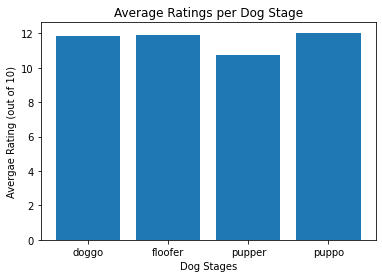

In [80]:
stages_list = ['doggo', 'floofer', 'pupper', 'puppo']
stage_rating = df_clean[df_clean.dog_stage.isin(stages_list)].groupby(['dog_stage']).mean()['dog_rating']

plt.bar(stage_rating.keys(), stage_rating.values)
plt.title('Average Ratings per Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Avergae Rating (out of 10)');

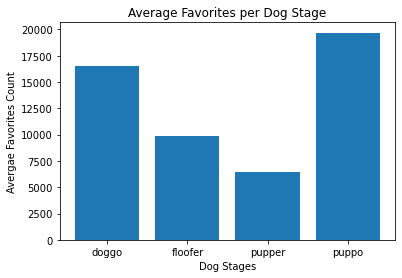

In [81]:
stage_favorites = df_clean[df_clean.dog_stage.isin(stages_list)].groupby(['dog_stage']).mean()['favorite_count']

plt.bar(stage_favorites.keys(), stage_favorites.values)
plt.title('Average Favorites per Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Avergae Favorites Count');

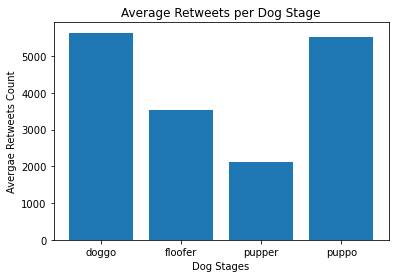

In [82]:
stage_retweets = df_clean[df_clean.dog_stage.isin(stages_list)].groupby(['dog_stage']).mean()['retweet_count']

plt.bar(stage_retweets.keys(), stage_retweets.values)
plt.title('Average Retweets per Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Avergae Retweets Count');

In [83]:
#feature engineering a most probable column for dog breed predictions
most_probable = []
for tweet in df_clean.tweet_id:
    row = df_clean[df_clean.tweet_id == tweet]
    tweet_index = row.index[0]
    if row.loc[tweet_index, 'p1_dog'] == True:
        most_probable.append(row.loc[tweet_index, 'p1'])
    elif row.loc[tweet_index, 'p2_dog'] == True:
        most_probable.append(row.loc[tweet_index, 'p2'])
    elif row.loc[tweet_index, 'p3_dog'] == True:
        most_probable.append(row.loc[tweet_index, 'p3'])
    else:
        most_probable.append(np.nan)
df_clean['probable_prediction'] = pd.Series(most_probable)

In [84]:
#testing where p1 is dog breed
(df_clean[df_clean.p1_dog == True]['probable_prediction'] == df_clean[df_clean.p1_dog == True]['p1']).sum()

1474

In [85]:
df_clean[df_clean.p1_dog == True].shape[0]

1474

In [86]:
#testing where p1 is not dog breed
df_clean[df_clean.p1_dog != True][['p2', 'p2_dog', 'p3', 'p3_dog', 'probable_prediction']]

,p2,p2_dog,p3,p3_dog,probable_prediction
0,bagel,False,banana,False,NaN
3,Labrador_retriever,True,spatula,False,Labrador_retriever
21,tow_truck,False,shopping_cart,False,NaN
27,sports_car,False,car_wheel,False,NaN
29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2133,otter,False,great_grey_owl,False,NaN
2136,desk,False,bookcase,False,NaN
2137,cock,False,partridge,False,NaN
2146,shopping_basket,False,golden_retriever,True,golden_retriever


In [87]:
#unique count of predictions
df_clean.probable_prediction.nunique()

113

In [88]:
top15_breeds = df_clean.probable_prediction.value_counts()[:15].keys()
df_clean[df_clean.probable_prediction.isin(top15_breeds)][['probable_prediction', 'dog_rating']].groupby(['probable_prediction']).mean().sort_values('dog_rating', ascending=False)

,dog_rating
probable_prediction,
Samoyed,11.690476
golden_retriever,11.560510
chow,11.416667
Pembroke,11.410526
Eskimo_dog,11.409091
cocker_spaniel,11.333333
French_bulldog,11.193548
Labrador_retriever,11.157407
toy_poodle,11.039216


The above table shows the average ratings for the top 15 most frequest dog breeds. This ranking is again shown below in the form of horizontal bars.

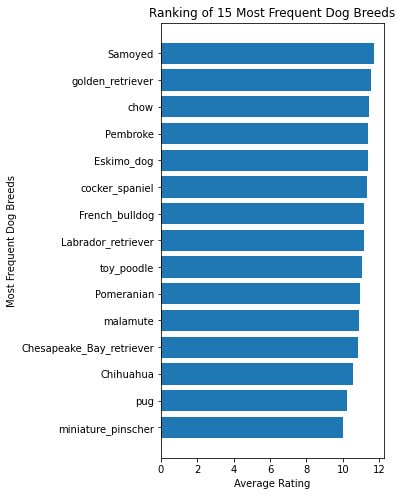

In [89]:
common_breeds = df_clean[df_clean.probable_prediction.isin(top15_breeds)].groupby(['probable_prediction']).mean()['dog_rating'].sort_values(ascending=False)[:15].sort_values()

plt.figure(figsize=(4, 8))
plt.barh(common_breeds.keys(), common_breeds.values)
plt.title('Ranking of 15 Most Frequent Dog Breeds')
plt.xlabel('Average Rating')
plt.ylabel('Most Frequent Dog Breeds');

In [90]:
df_clean[['probable_prediction', 'dog_rating']].groupby(['probable_prediction']).mean().sort_values('dog_rating', ascending=False)[:15]

,dog_rating
probable_prediction,
Bouvier_des_Flandres,13.000000
Saluki,12.500000
Tibetan_mastiff,12.250000
Border_terrier,12.142857
silky_terrier,12.000000
standard_schnauzer,12.000000
Irish_setter,11.750000
Gordon_setter,11.750000
Samoyed,11.690476


The above table shows the 15 top rated dog breeds. This ranking is again shown below in the form of horizontal bars.

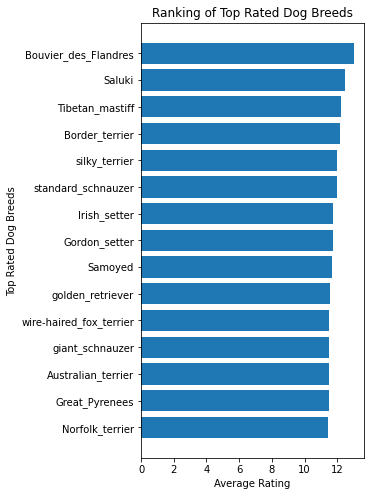

In [91]:
high_breeds = df_clean.groupby(['probable_prediction']).mean()['dog_rating'].sort_values(ascending=False)[:15].sort_values()

plt.figure(figsize=(4, 8))
plt.barh(high_breeds.keys(), high_breeds.values)
plt.title('Ranking of Top Rated Dog Breeds')
plt.xlabel('Average Rating')
plt.ylabel('Top Rated Dog Breeds');